<a href="https://colab.research.google.com/github/gkuch22/ml-final/blob/main/final_model_experiment_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch # Main PyTorch Library
import matplotlib.pyplot as plt # Used for visualizing the images and plotting the training progress
import pandas as pd # Used to read/create dataframes (csv) and process tabular data
import numpy as np # preprocessing and numerical/mathematical operations
import seaborn as sns

device = "cuda" if torch.cuda.is_available() else "cpu" # detect the GPU if any, if not use CPU, change cuda to mps if you have a mac
print("Device available: ", device)

Device available:  cpu


In [70]:
train_df = pd.read_csv('/content/drive/MyDrive/cs231n/assignments/final/datasets/train.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/cs231n/assignments/final/datasets/stores.csv')
features_df = pd.read_csv('/content/drive/MyDrive/cs231n/assignments/final/datasets/features.csv')

In [71]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [51]:
# train_df['Date'] = pd.to_datetime(train_df['Date'])
# train_df = train_df.sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True)
# merged_df = train_df

# DATA ANALYSIS

In [ ]:
store=1
dept=1
pair = train_df[(train_df['Store'] == store) & (train_df['Dept'] == dept)]
date_sales = pair[['Date', 'Weekly_Sales']].copy()
date_sales = date_sales.set_index('Date')

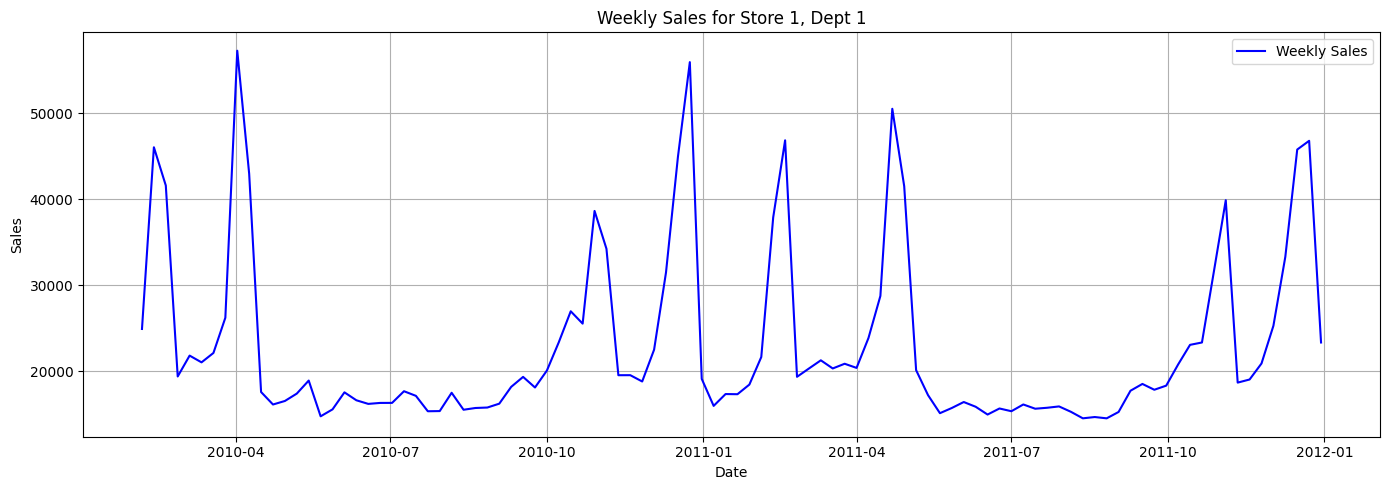

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(date_sales['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.title(f'Weekly Sales for Store {store}, Dept {dept}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(date_sales['Weekly_Sales'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -6.428269983539839
p-value: 1.7227457600886373e-08


In [ ]:
from scipy.stats import boxcox

sales_values = date_sales['Weekly_Sales'].values
date_sales['Weekly_Sales_BoxCox'], lam = boxcox(sales_values)

print(f"lambda: {lam}")

lambda: -2.010326156551293


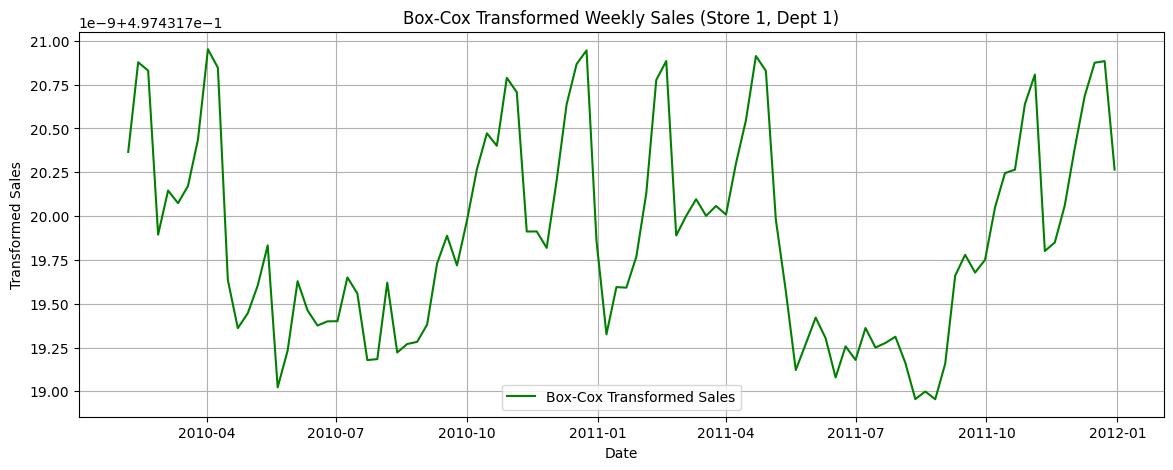

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(date_sales['Weekly_Sales_BoxCox'], label='Box-Cox Transformed Sales', color='green')
plt.title('Box-Cox Transformed Weekly Sales (Store 1, Dept 1)')
plt.xlabel('Date')
plt.ylabel('Transformed Sales')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
result = adfuller(date_sales['Weekly_Sales_BoxCox'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -4.303622764507977
p-value: 0.0004378391622780255


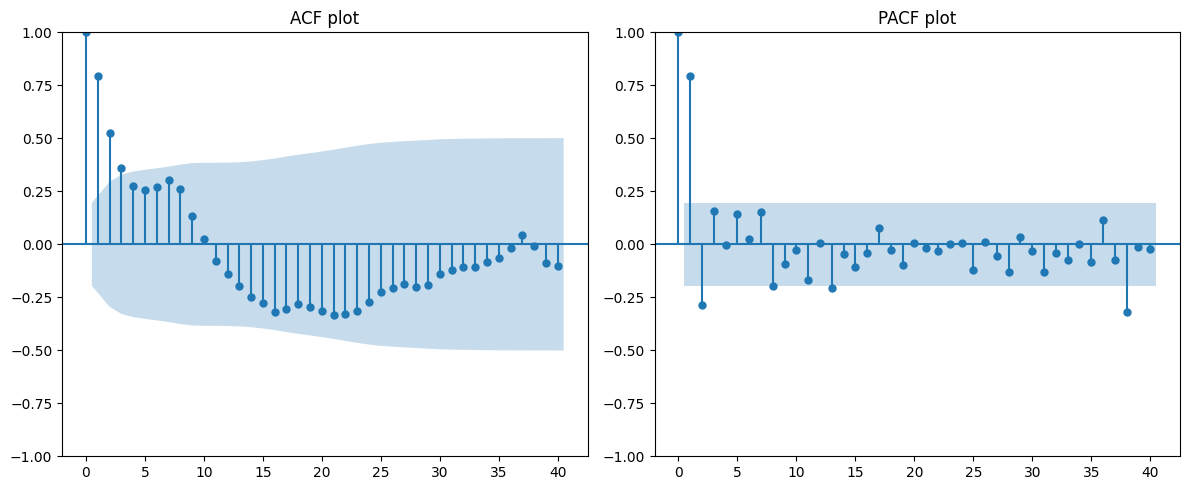

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = date_sales['Weekly_Sales_BoxCox'].dropna()

plt.figure(figsize=(12,5))

plt.subplot(121)
plot_acf(series, lags=40, ax=plt.gca())
plt.title('ACF plot')

plt.subplot(122)
plot_pacf(series, lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF plot')

plt.tight_layout()
plt.show()


In [ ]:
p = 8
q = 5

In [ ]:
pair = train_df[(train_df['Store'] == 45) & (train_df['Dept'] == 98)]
date_sales = pair[['Date', 'Weekly_Sales']].copy()
date_sales = date_sales.set_index('Date')

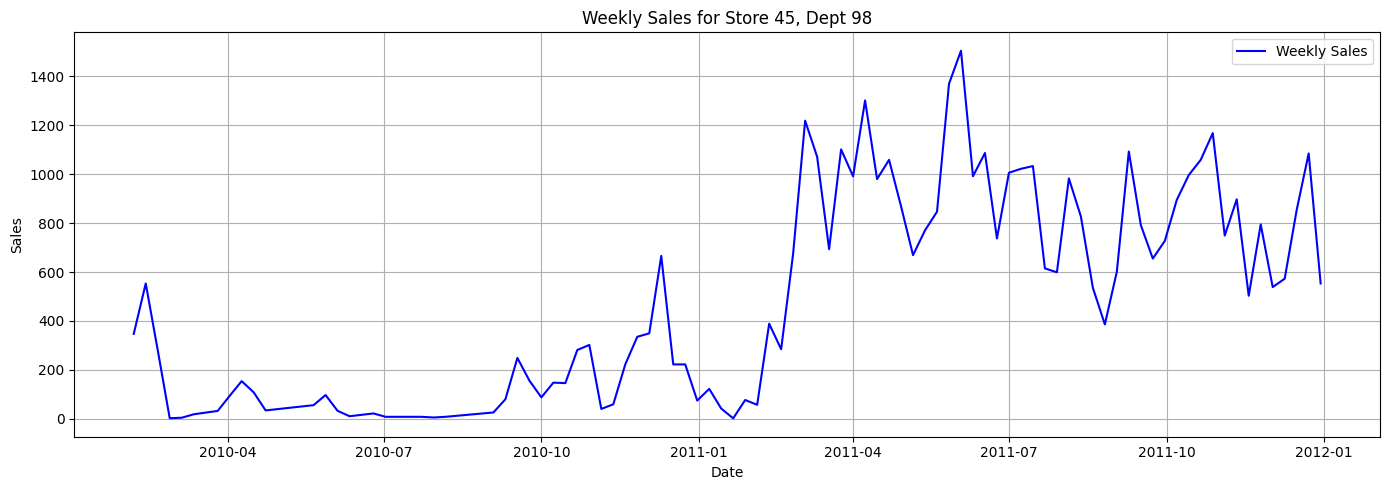

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(date_sales['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.title('Weekly Sales for Store 45, Dept 98')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(date_sales['Weekly_Sales'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.480670222290494
p-value: 0.5430509151198057


In [ ]:
from scipy.stats import boxcox

sales_values = date_sales['Weekly_Sales'].values
date_sales['Weekly_Sales_BoxCox'], lam = boxcox(sales_values)

print(f"lambda: {lam}")

lambda: 0.3775985829291484


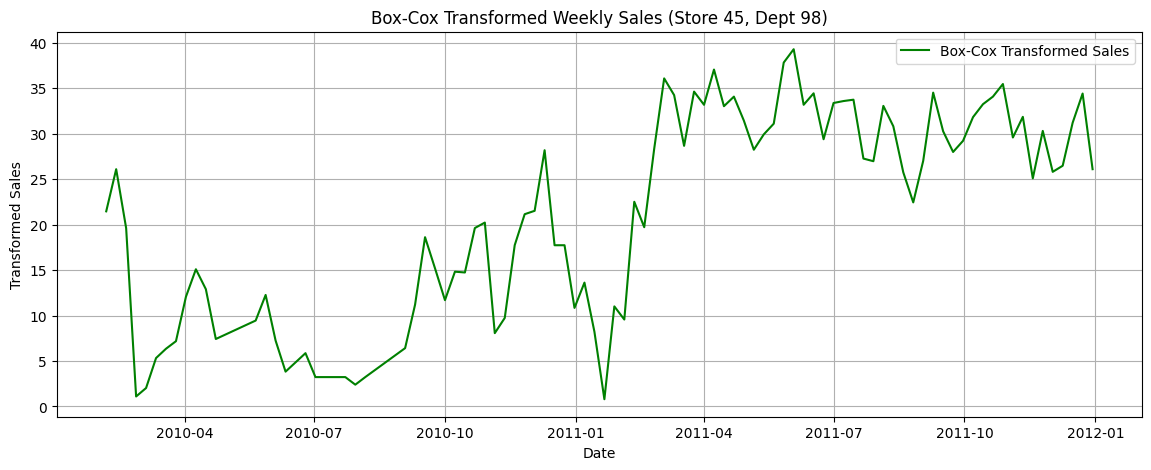

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(date_sales['Weekly_Sales_BoxCox'], label='Box-Cox Transformed Sales', color='green')
plt.title('Box-Cox Transformed Weekly Sales (Store 45, Dept 98)')
plt.xlabel('Date')
plt.ylabel('Transformed Sales')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
result = adfuller(date_sales['Weekly_Sales_BoxCox'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.1709549329157056
p-value: 0.21695548213813604


In [ ]:
date_sales['Weekly_Sales_BoxCox'] = date_sales['Weekly_Sales_BoxCox'].diff()
date_sales = date_sales.dropna()

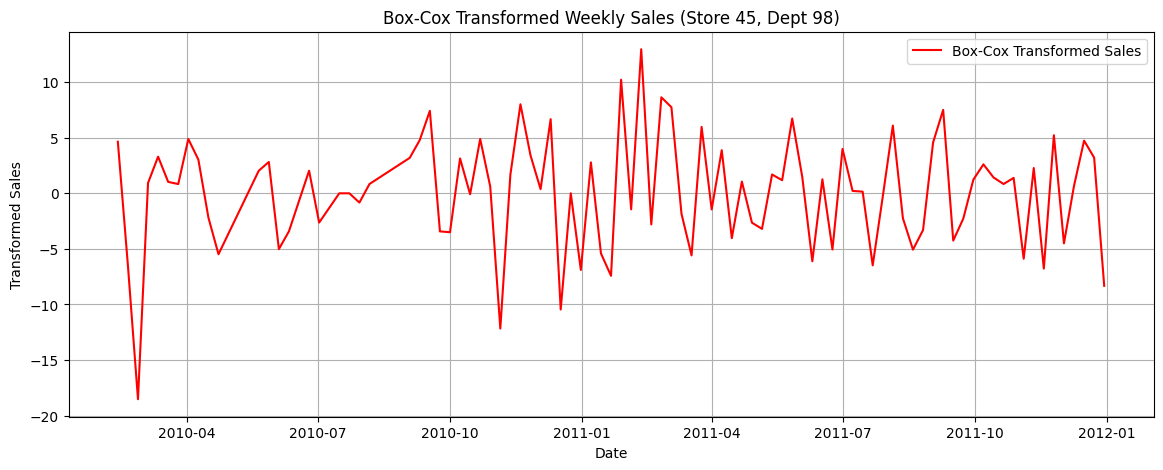

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(date_sales['Weekly_Sales_BoxCox'], label='Box-Cox Transformed Sales', color='red')
plt.title('Box-Cox Transformed Weekly Sales (Store 45, Dept 98)')
plt.xlabel('Date')
plt.ylabel('Transformed Sales')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
result = adfuller(date_sales['Weekly_Sales_BoxCox'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -10.191219992042662
p-value: 6.314764705088039e-18


# MODEL TRAINING

In [ ]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df = train_df.sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True)
merged_df = train_df

In [6]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [7]:
# from scipy.stats import boxcox

# sales_values = merged_df['Weekly_Sales'].values
# merged_df['Weekly_Sales_BoxCox'], lam = boxcox(sales_values)

# print(f"lambda: {lam}")

In [8]:
def get_wmae(y_true, y_pred, weights):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  weights = np.array(weights)
  return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

In [11]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA

all_train_true = []
all_train_pred = []
all_train_weights = []

all_valid_true = []
all_valid_pred = []
all_valid_weights = []

store_dept_pairs = merged_df[['Store', 'Dept']].drop_duplicates().values

p, d, q = 1, 0, 1

counter = 0
prev_store = 1

# def fit_arima_with_fallback(data, orders=[(1, 0, 1), (1, 1, 1)]):
#   for order in orders:
#     try:
#       model = ARIMA(data, order=order)
#       model_fit = model.fit()
#       return model_fit
#     except:
#       continue
#   return None


for store, dept in store_dept_pairs:
  print(f"{store} - {dept}")
  store_dept_pair = merged_df[(merged_df['Store'] == store) & (merged_df['Dept'] == dept)].copy()
  store_dept_pair = store_dept_pair.sort_values('Date').reset_index(drop=True)

  store_dept_pair['Year'] = store_dept_pair['Date'].dt.year
  store_dept_pair['Month'] = store_dept_pair['Date'].dt.month

  year_split = 2012
  month_split = 6

  train_df = store_dept_pair[store_dept_pair['Year'] < year_split]
  valid_df = store_dept_pair[(store_dept_pair['Year'] == year_split) & (store_dept_pair['Month'] < month_split)]
  test_df = store_dept_pair[(store_dept_pair['Year'] == year_split) & (store_dept_pair['Month'] >= month_split)]

  valid_size = len(valid_df)
  counter += valid_size

  if train_df.empty or valid_df.empty or len(train_df) < 15:
    overall_mean = store_dept_pair['Weekly_Sales'].mean()

    all_valid_true.extend(valid_df['Weekly_Sales'].values)
    all_valid_pred.extend([overall_mean] * len(valid_df))
    all_valid_weights.extend(np.where(valid_df['IsHoliday'], 5, 1))

    all_train_true.extend(train_df['Weekly_Sales'].values)
    all_train_pred.extend([overall_mean] * len(train_df))
    all_train_weights.extend(np.where(train_df['IsHoliday'], 5, 1))
    continue

  model = ARIMA(train_df['Weekly_Sales'], order=(p, d, q))
  model_fit = model.fit()

  # model_fit = fit_arima_with_fallback(train_df['Weekly_Sales'])

  # if model_fit is None:
  #   overall_mean = store_dept_pair['Weekly_Sales'].mean()

  #   all_valid_true.extend(valid_df['Weekly_Sales'].values)
  #   all_valid_pred.extend([overall_mean] * len(valid_df))
  #   all_valid_weights.extend(np.where(valid_df['IsHoliday'], 5, 1))

  #   all_train_true.extend(train_df['Weekly_Sales'].values)
  #   all_train_pred.extend([overall_mean] * len(train_df))
  #   all_train_weights.extend(np.where(train_df['IsHoliday'], 5, 1))
  #   continue

  yhat_train = model_fit.predict(start=train_df.index[0], end=train_df.index[-1])
  yhat_valid = model_fit.predict(start=valid_df.index[0], end=valid_df.index[-1], dynamic=False)

  all_train_true.extend(train_df['Weekly_Sales'].values)
  all_train_pred.extend(yhat_train.values)
  all_train_weights.extend(np.where(train_df['IsHoliday'], 5, 1))

  all_valid_true.extend(valid_df['Weekly_Sales'].values)
  all_valid_pred.extend(yhat_valid.values)
  all_valid_weights.extend(np.where(valid_df['IsHoliday'], 5, 1))

  if store != prev_store:
    prev_store = store
    print(f"valid size: {counter}")
    print(f"valid list: {len(all_valid_pred)}")


train_wmae = get_wmae(all_train_true, all_train_pred, all_train_weights)
valid_wmae = get_wmae(all_valid_true, all_valid_pred, all_valid_weights)

print(f"train wmae: {train_wmae:.2f}")
print(f"valid wmae: {valid_wmae:.2f}")
print(f"valid size: {counter}")
print(f"valid list: {len(all_valid_pred)}")
print()


# PIPELINE

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomPreprocessorClass(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X['Date'] = pd.to_datetime(X['Date'])
    X = X.sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True)
    return X


In [73]:
class CustomPairModelClass(BaseEstimator, TransformerMixin):
  def __init__(self, p=1, d=0, q=1):
    self.p = p
    self.d = d
    self.q = q
    self.models = {}
    self.fallback_means = {}

  def fit(self, merged_df):
    all_train_true = []
    all_train_pred = []
    all_train_weights = []

    all_valid_true = []
    all_valid_pred = []
    all_valid_weights = []

    store_dept_pairs = merged_df[['Store', 'Dept']].drop_duplicates().values

    for store, dept in store_dept_pairs:
      print(f"{store} - {dept}")
      store_dept_pair = merged_df[(merged_df['Store'] == store) & (merged_df['Dept'] == dept)].copy()
      store_dept_pair = store_dept_pair.sort_values('Date').reset_index(drop=True)

      store_dept_pair['Year'] = store_dept_pair['Date'].dt.year
      store_dept_pair['Month'] = store_dept_pair['Date'].dt.month

      year_split = 2012
      month_split = 6

      train_df = store_dept_pair[store_dept_pair['Year'] < year_split]
      valid_df = store_dept_pair[(store_dept_pair['Year'] == year_split) & (store_dept_pair['Month'] < month_split)]
      test_df = store_dept_pair[(store_dept_pair['Year'] == year_split) & (store_dept_pair['Month'] >= month_split)]

      if train_df.empty or valid_df.empty or len(train_df) < 15:
        self.fallback_means[(store, dept)] = store_dept_pair['Weekly_Sales'].mean()
        continue

      model = ARIMA(train_df['Weekly_Sales'], order=(self.p, self.d, self.q))
      model_fit = model.fit()

      self.models[(store, dept)] = model_fit

      yhat_train = model_fit.predict(start=train_df.index[0], end=train_df.index[-1])
      yhat_valid = model_fit.predict(start=valid_df.index[0], end=valid_df.index[-1], dynamic=False)

      all_train_true.extend(train_df['Weekly_Sales'].values)
      all_train_pred.extend(yhat_train.values)
      all_train_weights.extend(np.where(train_df['IsHoliday'], 5, 1))

      all_valid_true.extend(valid_df['Weekly_Sales'].values)
      all_valid_pred.extend(yhat_valid.values)
      all_valid_weights.extend(np.where(valid_df['IsHoliday'], 5, 1))


    train_wmae = get_wmae(all_train_true, all_train_pred, all_train_weights)
    valid_wmae = get_wmae(all_valid_true, all_valid_pred, all_valid_weights)

    print(f"train wmae: {train_wmae:.2f}")
    print(f"valid wmae: {valid_wmae:.2f}")

    return self


  def predict(self, test_df):
    test_df = test_df.copy()
    test_df['Weekly_Sales'] = np.nan
    test_df['Date'] = pd.to_datetime(test_df['Date'])

    for (store, dept), group in test_df.groupby(['Store', 'Dept']):
      mask = (test_df['Store'] == store) & (test_df['Dept'] == dept)

      if (store, dept) in self.models:
        model = self.models[(store, dept)]
        steps = len(group)
        prediction = model.forecast(steps=steps)
        test_df.loc[mask, 'Weekly_Sales'] = prediction.values
      elif (store, dept) in self.fallback_means:
        test_df.loc[mask, 'Weekly_Sales'] = self.fallback_means[(store, dept)]
      else:
        test_df.loc[mask, 'Weekly_Sales'] = 0.0

    test_df['Id'] = test_df['Store'].astype(str) + "_" + test_df['Dept'].astype(str) + "_" + test_df['Date'].dt.strftime('%Y-%m-%d')
    test_df['Weekly_Sales'].fillna(0, inplace=True)
    return test_df[['Id', 'Weekly_Sales']]



In [74]:
class CustomArimaClass(BaseEstimator):
  def __init__(self, p=1, d=0, q=1):
    self.prep = CustomPreprocessorClass()
    self.model = CustomPairModelClass(p=p, d=d, q=q)

  def fit(self, train_df):
    merged_df = self.prep.transform(train_df)
    self.model.fit(merged_df)

  def predict(self, test_df):
    merged_test = self.prep.transform(test_df)
    merged_test = merged_test.fillna(0)
    return self.model.predict(merged_test)


In [75]:
test_df = pd.read_csv('/content/drive/MyDrive/cs231n/assignments/final/datasets/test.csv')

In [76]:
pipeline = CustomArimaClass()
pipeline.fit(train_df)
predictions = pipeline.predict(test_df)

1 - 1
1 - 2
1 - 3
1 - 4
1 - 5
1 - 6
1 - 7
1 - 8
1 - 9
1 - 10
1 - 11
1 - 12
1 - 13
1 - 14
1 - 16
1 - 17
1 - 18
1 - 19
1 - 20
1 - 21
1 - 22
1 - 23
1 - 24
1 - 25
1 - 26
1 - 27
1 - 28
1 - 29
1 - 30
1 - 31
1 - 32
1 - 33
1 - 34
1 - 35
1 - 36
1 - 37
1 - 38
1 - 40
1 - 41
1 - 42
1 - 44
1 - 45
1 - 46
1 - 47
1 - 48
1 - 49
1 - 51
1 - 52
1 - 54
1 - 55
1 - 56
1 - 58
1 - 59
1 - 60
1 - 67
1 - 71
1 - 72
1 - 74
1 - 77
1 - 78
1 - 79
1 - 80
1 - 81
1 - 82
1 - 83
1 - 85
1 - 87
1 - 90
1 - 91
1 - 92
1 - 93
1 - 94
1 - 95
1 - 96
1 - 97
1 - 98
1 - 99
2 - 1
2 - 2
2 - 3
2 - 4
2 - 5
2 - 6
2 - 7
2 - 8
2 - 9
2 - 10
2 - 11
2 - 12
2 - 13
2 - 14
2 - 16
2 - 17
2 - 18
2 - 19
2 - 20
2 - 21
2 - 22
2 - 23
2 - 24
2 - 25
2 - 26
2 - 27
2 - 28
2 - 29
2 - 30
2 - 31
2 - 32
2 - 33
2 - 34
2 - 35
2 - 36
2 - 37
2 - 38
2 - 39
2 - 40
2 - 41
2 - 42
2 - 44
2 - 45
2 - 46
2 - 47
2 - 48
2 - 49
2 - 51
2 - 52
2 - 54
2 - 55
2 - 56
2 - 58
2 - 59
2 - 60
2 - 67
2 - 71
2 - 72
2 - 74
2 - 77
2 - 78
2 - 79
2 - 80
2 - 81
2 - 82
2 - 83
2 - 85
2 - 87
2 -

In [64]:
predictions

,Id,Weekly_Sales
0,1_1_2012-11-02,17136.318103
1,1_1_2012-11-09,21482.098925
2,1_1_2012-11-16,22595.489810
3,1_1_2012-11-23,22880.741026
4,1_1_2012-11-30,22953.822508
...,...,...
115059,45_98_2013-06-28,507.355294
115060,45_98_2013-07-05,506.753506
115061,45_98_2013-07-12,506.203374
115062,45_98_2013-07-19,505.700464


In [65]:
predictions.to_csv('arima_submission.csv', index=False)

# MLFLOW TRACKING

In [79]:
# !pip install dagshub mlflow -q

In [80]:
# import dagshub
# import mlflow

# dagshub.init(repo_owner='gkuch22', repo_name='ml-final', mlflow=True)

In [81]:
# experiment_name = "Arima_train"
# run_name = "arima_pipeline"

In [82]:
# import mlflow

# mlflow.set_experiment(experiment_name)

# with mlflow.start_run(run_name=run_name):

#     mlflow.log_param("model_type", "Arima")
#     mlflow.log_param("p", p)
#     mlflow.log_param("d", d)
#     mlflow.log_param("q", q)


#     # model = Prophet()
#     # model.fit(train_df[['ds', 'y']])

#     # y_pred_train = model.predict(train_df[['ds']])
#     # y_pred_valid = model.predict(valid_df[['ds']])

#     # yhat_train = y_pred_train['yhat'].values
#     # yhat_valid = y_pred_valid['yhat'].values

#     # weights_train = np.where(train_df['IsHoliday'], 5, 1)
#     # weights_valid = np.where(valid_df['IsHoliday'], 5, 1)

#     # train_wmae = get_wmae(train_df['y'].values, yhat_train, weights_train)
#     # valid_wmae = get_wmae(valid_df['y'].values, yhat_valid, weights_valid)

#     # print(f"train wmae: {train_wmae:.2f}")
#     # print(f"valid wmae: {valid_wmae:.2f}")
#     # print()

#     # mlflow.log_metric("train_wmae", train_wmae)
#     # mlflow.log_metric("valid_wmae", valid_wmae)

#     mlflow.sklearn.log_model(pipeline, "model")
